# Import necessary libraries

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [33]:
# load the dataset
dt = pd.read_csv(r'/content/final_internship_data.csv')

In [34]:
dt.head()

,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703


In [35]:
len(dt)

500000

In [36]:
dt.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [37]:
# suumery statistics
dt.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916617,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


In [38]:
dt.shape

(500000, 26)

In [39]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  int64  
 16  mo

# 1. Data Preprocessing

In [40]:
# Check for null values
print("Null values:\n", dt.isnull().sum())

Null values:
 User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64


In [41]:
print("Data types:\n", dt.dtypes)

Data types:
 User ID               object
User Name             object
Driver Name           object
Car Condition         object
Weather               object
Traffic Condition     object
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
weekday                int64
year                   int64
jfk_dist             float64
ewr_dist             float64
lga_dist             float64
sol_dist             float64
nyc_dist             float64
distance             float64
bearing              float64
dtype: object


In [42]:
# Step 1: Handle Missing Values
# Drop rows with missing target (if applicable) or critical columns
dt.dropna(subset=['dropoff_longitude', 'dropoff_latitude'], inplace=True)

In [43]:
# Impute missing values in continuous variables with median (or mean)
dt['jfk_dist'].fillna(dt['jfk_dist'].median(), inplace=True)
dt['ewr_dist'].fillna(dt['ewr_dist'].median(), inplace=True)
dt['lga_dist'].fillna(dt['lga_dist'].median(), inplace=True)
dt['sol_dist'].fillna(dt['sol_dist'].median(), inplace=True)
dt['nyc_dist'].fillna(dt['nyc_dist'].median(), inplace=True)
dt['distance'].fillna(dt['distance'].median(), inplace=True)
dt['bearing'].fillna(dt['bearing'].median(), inplace=True)

<ipython-input-43-aab0e69adc5d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['jfk_dist'].fillna(dt['jfk_dist'].median(), inplace=True)
<ipython-input-43-aab0e69adc5d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [44]:
# Step 2: Check and handle duplicates
duplicate_rows = dt[dt.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [User ID, User Name, Driver Name, Car Condition, Weather, Traffic Condition, key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day, month, weekday, year, jfk_dist, ewr_dist, lga_dist, sol_dist, nyc_dist, distance, bearing]
Index: []

[0 rows x 26 columns]


In [45]:
# Drop duplicate rows
dt = dt.drop_duplicates()

# Confirm that duplicates are removed
print("Data after removing duplicates:")
print(dt)

Data after removing duplicates:
         User ID          User Name       Driver Name Car Condition Weather  \
0       KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1       lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2       gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3       9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4       8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   
...          ...                ...               ...           ...     ...   
499995  er7Luy6J       Morgan Smith   Gabriel Coleman           Bad   rainy   
499996  FWDZu9NA     Dillon Jackson    Larry Richards     Very Good   rainy   
499997  QZIMcpLZ  Michael Rodriguez    Lonnie Santana           Bad   rainy   
499998  AD72Uwmn       Deborah Soto      Emily Rivera          Good  stormy   
499999  qGKn4Um5         Eric Jones        Julie King     Very Good   sunny   

        Traffic Con

In [46]:
# Step 3: Data Type Conversion
# Convert `pickup_datetime` to datetime
dt['pickup_datetime'] = pd.to_datetime(dt['pickup_datetime'])

In [47]:
# Step 4: Remove irrelevant features
# Drop columns like `User ID`, `User Name`, `Driver Name`, `key`
dt.drop(['User ID', 'User Name', 'Driver Name', 'key'], axis=1, inplace=True)

In [48]:
# Feature Engineering
# Extract hour, day, month, year, weekday from pickup_datetime
dt['pickup_hour'] = dt['pickup_datetime'].dt.hour
dt['pickup_day'] = dt['pickup_datetime'].dt.day
dt['pickup_month'] = dt['pickup_datetime'].dt.month
dt['pickup_year'] = dt['pickup_datetime'].dt.year
dt['pickup_weekday'] = dt['pickup_datetime'].dt.weekday

In [49]:
# Drop the original pickup_datetime column after feature extraction
dt.drop('pickup_datetime', axis=1, inplace=True)

In [50]:
# Display the final preprocessed DataFrame
print(dt.head())

  Car Condition Weather  Traffic Condition  fare_amount  pickup_longitude  \
0     Very Good   windy  Congested Traffic          4.5         -1.288826   
1     Excellent  cloudy       Flow Traffic         16.9         -1.291824   
2           Bad  stormy  Congested Traffic          5.7         -1.291242   
3     Very Good  stormy       Flow Traffic          7.7         -1.291319   
4           Bad  stormy  Congested Traffic          5.3         -1.290987   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0         0.710721          -1.288779          0.710563                1   
1         0.710546          -1.291182          0.711780                1   
2         0.711418          -1.291391          0.711231                2   
3         0.710927          -1.291396          0.711363                1   
4         0.711536          -1.290787          0.711811                1   

   hour  ...   lga_dist   sol_dist   nyc_dist  distance   bearing  \
0    17  ..

### Encoding
* using OneHotEncoder

In [51]:
dt

,Car Condition,Weather,Traffic Condition,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,...,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday
0,Very Good,windy,Congested Traffic,4.5,-1.288826,0.710721,-1.288779,0.710563,1,17,...,14.342611,34.543548,27.572573,1.030764,-2.918897,17,15,6,2009,0
1,Excellent,cloudy,Flow Traffic,16.9,-1.291824,0.710546,-1.291182,0.711780,1,16,...,23.130775,15.125872,8.755732,8.450134,-0.375217,16,5,1,2010,1
2,Bad,stormy,Congested Traffic,5.7,-1.291242,0.711418,-1.291391,0.711231,2,0,...,19.865289,17.722624,9.847344,1.389525,2.599961,0,18,8,2011,3
3,Very Good,stormy,Flow Traffic,7.7,-1.291319,0.710927,-1.291396,0.711363,1,4,...,21.063132,15.738963,7.703421,2.799270,0.133905,4,21,4,2012,5
4,Bad,stormy,Congested Traffic,5.3,-1.290987,0.711536,-1.290787,0.711811,1,7,...,15.219339,23.732406,15.600745,1.999157,-0.502703,7,9,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,Bad,rainy,Dense Traffic,7.0,-1.291173,0.711514,-1.290951,0.711371,1,18,...,17.157511,20.401068,12.280187,1.404709,-2.275706,18,7,5,2015,3
499996,Very Good,rainy,Flow Traffic,13.7,-1.291595,0.710670,-1.291708,0.710540,1,12,...,26.463167,8.596656,0.994796,0.994184,2.556931,12,13,9,2010,0
499997,Bad,rainy,Flow Traffic,25.0,-1.291262,0.710796,-1.289737,0.710366,1,0,...,19.708214,19.066488,11.663395,7.859324,-1.926251,0,25,8,2014,0
499998,Good,stormy,Congested Traffic,6.5,-1.291101,0.711335,-1.291023,0.711480,6,12,...,17.227166,20.006433,11.819775,0.994470,-0.384817,12,12,1,2015,0


In [52]:
dt.columns

Index(['Car Condition', 'Weather', 'Traffic Condition', 'fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'pickup_hour', 'pickup_day',
       'pickup_month', 'pickup_year', 'pickup_weekday'],
      dtype='object')

In [53]:
categorical_features = ['Car Condition','Weather','Traffic Condition']
numerical_features = ['fare_amount',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing', 'pickup_hour', 'pickup_day',
       'pickup_month', 'pickup_year', 'pickup_weekday']
for f in categorical_features:
    print(dt[f].unique())


['Very Good' 'Excellent' 'Bad' 'Good']
['windy' 'cloudy' 'stormy' 'sunny' 'rainy']
['Congested Traffic' 'Flow Traffic' 'Dense Traffic']


In [54]:
# Building the encoder
OHE = OneHotEncoder(sparse_output=False,drop='first')
dt_encoded = OHE.fit_transform(dt[categorical_features])
dt_encoded

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [55]:
# assign the feature name to each column after encoding
dt_encoded = pd.DataFrame(dt_encoded, columns=OHE.get_feature_names_out(categorical_features).tolist())
dt_encoded


,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
499990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
499991,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
499992,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
499993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [56]:
# Concatinateing the encoded features to the original dataframe
dt_final = pd.concat([dt_encoded,dt],axis=1,join='inner')
dt_final.drop(labels=categorical_features,axis=1,inplace=True)
dt_final

,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic,fare_amount,...,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.5,...,14.342611,34.543548,27.572573,1.030764,-2.918897,17,15,6,2009,0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.9,...,23.130775,15.125872,8.755732,8.450134,-0.375217,16,5,1,2010,1
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.7,...,19.865289,17.722624,9.847344,1.389525,2.599961,0,18,8,2011,3
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,7.7,...,21.063132,15.738963,7.703421,2.799270,0.133905,4,21,4,2012,5
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.3,...,15.219339,23.732406,15.600745,1.999157,-0.502703,7,9,3,2010,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499990,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.3,...,19.588846,18.970700,11.241682,1.609658,-0.404242,16,6,9,2010,0
499991,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,...,20.704710,15.442596,7.243390,1.258712,0.324497,0,1,5,2014,3
499992,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16.1,...,24.692609,13.621324,8.050550,7.343098,-2.656809,1,30,5,2009,5
499993,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.5,...,10.869932,27.883807,19.840035,7.507478,-2.283101,2,18,2,2013,0


In [57]:
# Checking where is the null values in final
dt_final[dt_final.isnull().any(axis=1)]

,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,Weather_rainy,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic,fare_amount,...,lga_dist,sol_dist,nyc_dist,distance,bearing,pickup_hour,pickup_day,pickup_month,pickup_year,pickup_weekday


# Visualisation

## Distribution of Numerical Features

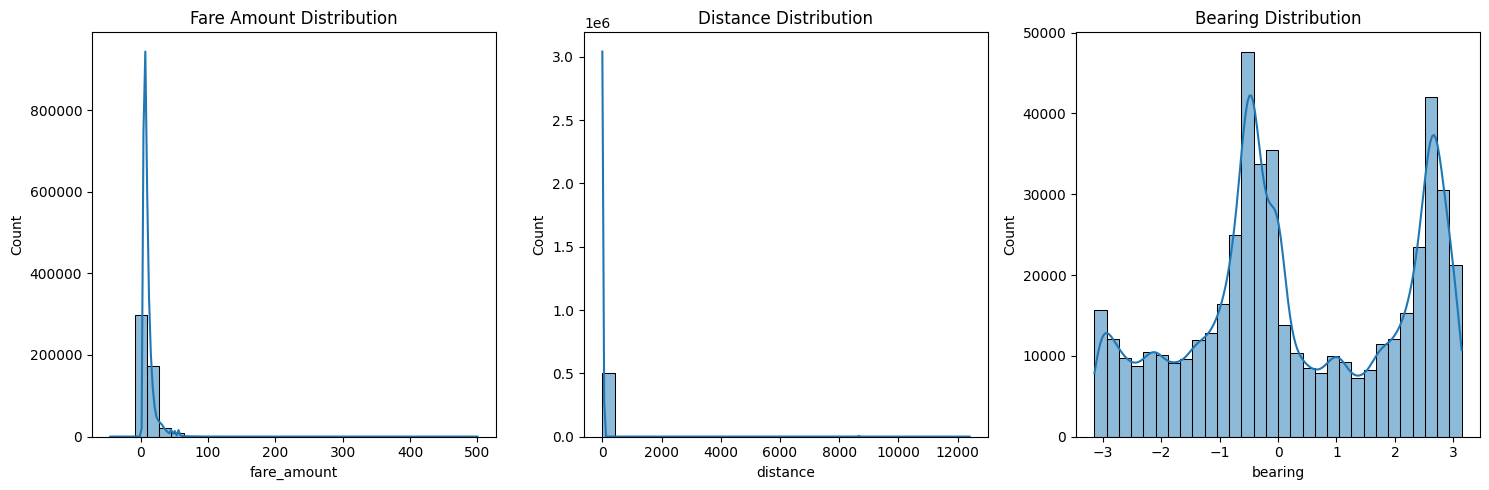

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(dt_final['fare_amount'], kde=True, bins=30)
plt.title('Fare Amount Distribution')

plt.subplot(1, 3, 2)
sns.histplot(dt_final['distance'], kde=True, bins=30)
plt.title('Distance Distribution')

plt.subplot(1, 3, 3)
sns.histplot(dt_final['bearing'], kde=True, bins=30)
plt.title('Bearing Distribution')

plt.tight_layout()
plt.show()


# Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


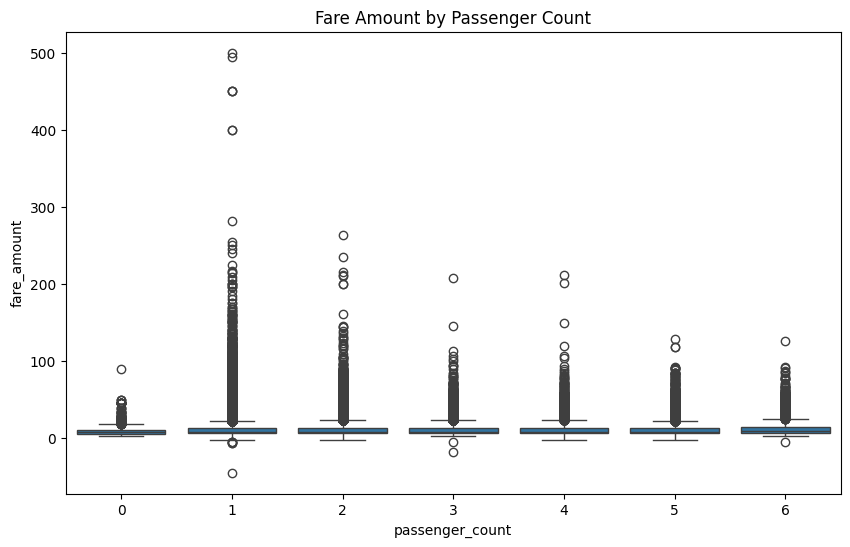

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='fare_amount', data=dt_final)
plt.title('Fare Amount by Passenger Count')
plt.show()

# Scatter Plot

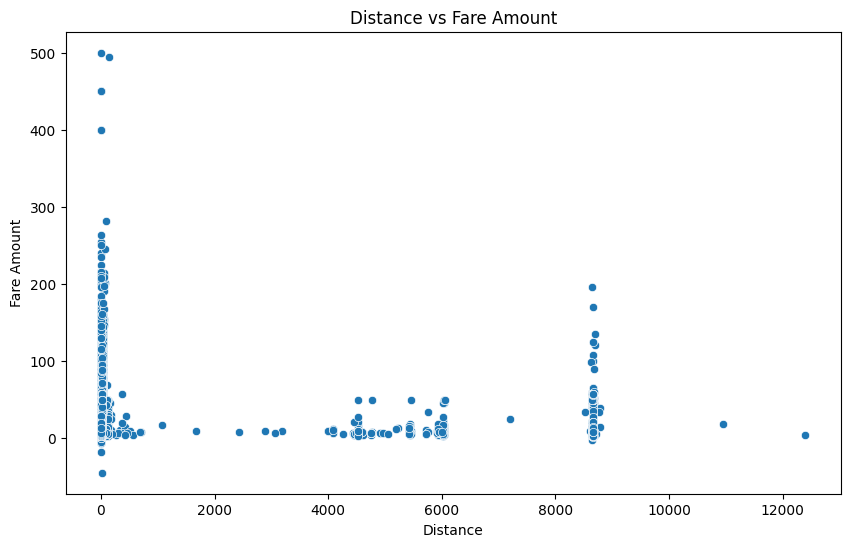

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='fare_amount', data=dt_final)
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.show()

# Count Plot

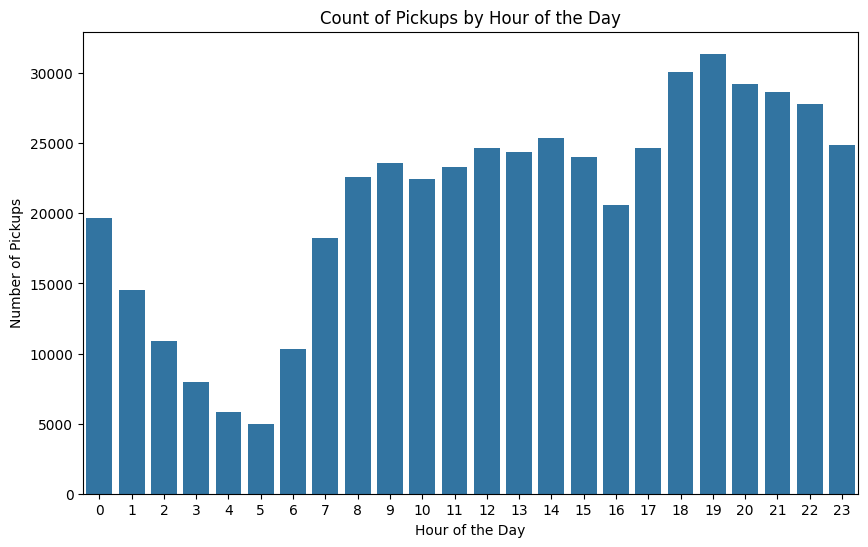

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=dt_final)
plt.title('Count of Pickups by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.show()

# Pair Plot for Selected Features

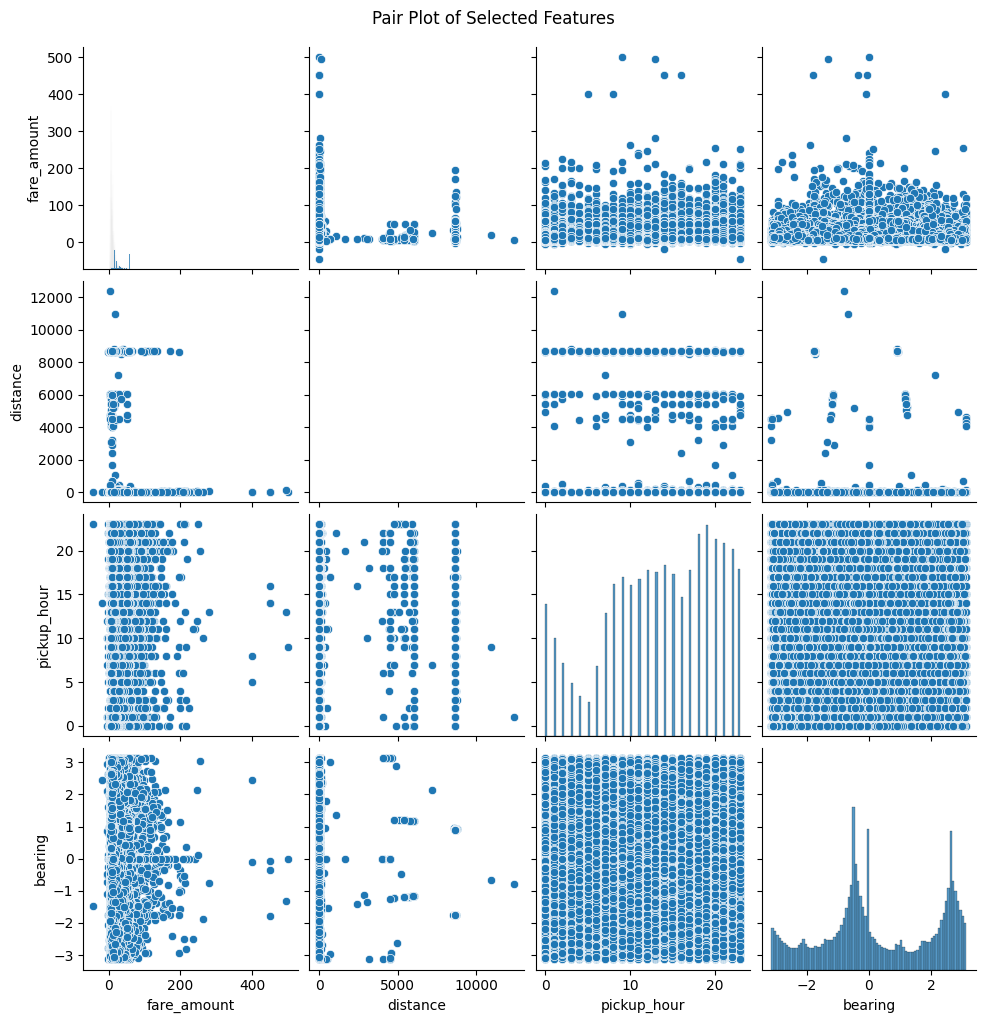

In [62]:
selected_features = ['fare_amount', 'distance', 'pickup_hour', 'bearing']
sns.pairplot(dt_final[selected_features])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()